### Analyzing the Stroop Effect


(1) What is the independent variable? What is the dependent variable?

--Independent Variable: is font name and color are the same, or different. Dependant variable: is the reaction time between stimulus and response.--


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

--The Stroop Effect shows that when a color word is printed in the same color word as the word, people can name the ink color more quickly (congruent environment) compared with when a color word is printed with an ink color that is different from the word (incongruent environment). For the null hypothesis: I chose the congruent environment mean - incongruent environment mean is equal to 0.  For the alternate hypothesis: I chose the congruent environment mean - incongruent mean mean is less than 0.  I chose these hypotheses, because we're going to find an observed difference in the stroop effect claims between times of congruent environment and incongruent envirmonment.--

**$$Please\ not\ the\ the\ mathematical\ statement\ of\ my\ hypotheses\ below\ with\ an\ explanation\ of\ the\ notation\ used\ below\ that:$$**

**$$Mathematical\ Statement:$$**
**$$H_0: \mu_{c} - \mu_{i} = 0$$**
**$$H_1: \mu_{c} - \mu_{i} < 0$$**

**$$Definitions\ of\ Notation\ Used:$$**
**$$H_O: Null\ Hypothesis$$**
**$$H_1: Alternative\ Hypothesis$$**
**$$\mu_{c}: congruent\ population\ mean$$**
**$$\mu_{i}: incongruent\ population\ mean$$**

--I chose to use a paired t-test because we're measuring times from the same subject to see the before and after result. Another reason I chose this method; is our sample, or in this case population, is already small at 24 participants.  In addition, the distribtuions of both congruent and incongruent populations weren't really evenly distributed, so using a z test, or f test which both are sensitive to non normality; probably wouldn't be the best choice. You could probably try bootstaping, but I didn't feel like that method was as effective as a paired t-test.--

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in dataset
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#description of the data
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
def descriptive_statistics():
    
    c = df['Congruent']
    i = df['Incongruent']
    
    #at least one measure of central tendencey - mean times of congruent and incongruent
    c_mean = c.mean()
    i_mean = i.mean()
    
    #at least one measure of variability - standard deviation of congruent and incongruent
    c_std = c.std()
    i_std = i.std()
    
    print('Congruent Mean:',round(c_mean,2))
    print('Congruent Std Deviation:',round(c_std,2),'\n')
    print('Incongruent Mean:',round(i_mean,2))
    print('Incongruent Std Deviation:',round(i_std,2))
    
    return;

descriptive_statistics()

Congruent Mean: 14.05
Congruent Std Deviation: 3.56 

Incongruent Mean: 22.02
Incongruent Std Deviation: 4.8


--I calculated the mean std deviation for the congruent environment times: the mean is 14.05 and std dev is 3.56. Also, I calcualted the mean and std deviation for the incongruent environment times: the mean is 22.02 and std dev is 4.8.  Based on the descriptive statistics this does seems to show in favor alternative hypothesis showing incongruent does have a higher average, but the standard deviation is higher too which does indicates the data isn't as close to the average as the congruent times.  This could be due to individuals performing better than others.--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

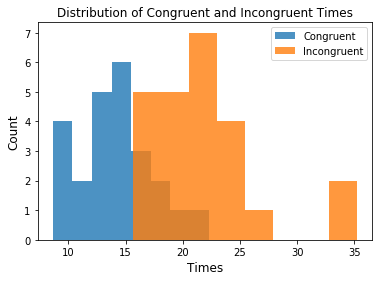

In [5]:
#histogram shows the distributions of congruent and incongruent times
df['Congruent'].hist(alpha=0.8,bins=8,label='Congruent');
df['Incongruent'].hist(alpha=0.8,bins=8,label='Incongruent');
plt.title('Distribution of Congruent and Incongruent Times')
plt.xlabel('Times',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.grid(False)
plt.legend();

correlation coefficient between Congruent and Incongruent...

[[1.         0.35181953]
 [0.35181953 1.        ]]


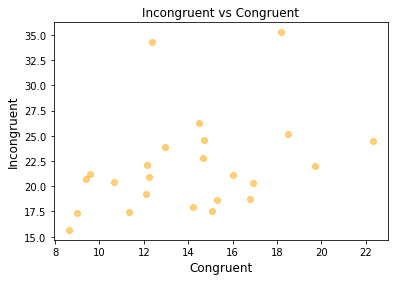

In [6]:
#correlation coefficient between congruent and incongruent
x = df.Congruent
y = df.Incongruent

cc = np.corrcoef(x, y)

print('correlation coefficient between Congruent and Incongruent...\n')
print(cc)
    
#scatter plot showing a moderate positive correlation between age and overall rating
plt.scatter(x, y, alpha=0.5,color='orange')
plt.title('Incongruent vs Congruent',fontsize=12)
plt.xlabel('Congruent',fontsize=12)
plt.ylabel('Incongruent',fontsize=12)
plt.show();

--Histrograms show side by side congruent environment distribution and incongruent environment distribution. The congruent distribution is slightly normarally distributed. The incongruent distribution appears skewed to the right slightly due to large outlier at 35. Scatter plot shows a weak positve correlation and correlation coefficient of .351 shows that as well.--

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
def stat_test():
    
    from scipy.stats import distributions as dists
    from scipy.stats import stats as st
    
    #insert a column with the difference between congruent and incongruent environment times
    df['diff'] = df['Congruent'] - df['Incongruent']
    
    #diff column mean and std deviation
    diff_mean = df['diff'].mean()
    diff_std = df['diff'].std()
    print('mean difference:',diff_mean)
    print('std deviation difference:',diff_std,'\n')
    
    #critical t for significance level of .05 and degree of freedom of 23 (n-1)
    tcritical = dists.t.ppf(1-.05/2,23)
    print('critical t:',tcritical)
    
    #t-statistic and p-value for a paired two tailed test
    paired_sample = st.ttest_rel(df['Congruent'], df['Incongruent'])
    print('The t-statistic is %.12f and two tailed p-value result is %.12f'% paired_sample)
    
    return;

stat_test()

mean difference: -7.964791666666667
std deviation difference: 4.864826910359056 

critical t: 2.0686576104190406
The t-statistic is -8.020706944110 and two tailed p-value result is 0.000000041030


**Conclusion:**
--Because the t-value falls outside the acceptance region between 2.068 and -2.068 critical t-values, we 
reject the null hypothesis. Another way to interpret the result is that the p-value is lower than the critical t-value and the type I error rate or alpha of .05 (5%), the probability of not getting a observed or extreme mean diﬀerence given the null hypothesis is false; therefore, we reject the null hypothesis. Mean diﬀerence between congruent environment and incongruent environment is statistically signiﬁcant and not based on chance.--

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--"Stroop effect" is named after J.Ridley Stroop; basically, the words have a stronger influence over the ability to say the color.  This is due to the inference between different information your brain receives which causes the problem. For example, the the actual word vs the color of the word; it's easier to read the word, because naming the color requires more attention.   Completing the second part of the test requires more concentration which is due to longer reaction times.   An alternative, or similar task in a similar effect might be reading numbers forward and backwards.  For example, reading 1 2 would probably quicker than reading 2 1.--